In [32]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [33]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data() 

In [34]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [35]:
train_images[0]
train_images.ndim
test_labels[0]

7

#Listing 2.2: Network Achitecture

In [36]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation="softmax"))

#Listing 2.2: The compilation step

In [37]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Preparing image data

In [38]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

#Preparing lebels

In [39]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [40]:
network.fit(train_images,train_labels,epochs = 3,batch_size=128)

Epoch 1/3
469/469 [==============================] - 5s 10ms/step - loss: 0.4263 - accuracy: 0.8745
Epoch 2/3
469/469 [==============================] - 5s 10ms/step - loss: 0.1094 - accuracy: 0.9685
Epoch 3/3
469/469 [==============================] - 5s 10ms/step - loss: 0.0664 - accuracy: 0.9805


#Evaluation & prediction

In [41]:
loss,acc = network.evaluate(test_images,test_labels)
print("Loss: ",loss)
print("Accuracy: ",acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9748
Loss:  0.07773765921592712
Accuracy:  0.9747999906539917


In [42]:
network.predict(test_images)[0]

array([2.0831386e-07, 1.3055749e-08, 1.6261125e-05, 7.0344069e-04,
       5.3738070e-10, 2.4673372e-07, 1.0978561e-11, 9.9926037e-01,
       3.3687408e-07, 1.9191672e-05], dtype=float32)

#Checking

In [43]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data() 

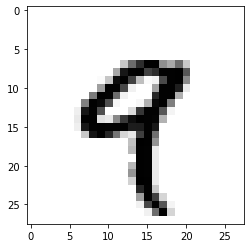

In [44]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap= plt.cm.binary)
plt.show()

#Now for mnist_fashion data

In [57]:
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data() 

In [58]:
train_images = train_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([layers.Flatten(),layers.Dense(512,activation='relu'),layers.Dense(10,activation="softmax")])

In [59]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images,train_labels,epochs = 5,batch_size=128)
loss,acc = model.evaluate(test_images,test_labels)
print("Loss: ",loss)
print("Accuracy: ",acc)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4629 - accuracy: 0.8671
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1174 - accuracy: 0.9667
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0709 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0495 - accuracy: 0.9859
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9787
Loss:  0.0688597559928894
Accuracy:  0.9786999821662903
